In [ ]:
#for mathematical computation

import numpy as np
import pandas as pd
import scipy.stats as stats

#for data visualization

import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
from matplotlib.pyplot import figure

% matplotlib inline

In [ ]:
df = pd.read_csv("/content/CO2Emission_LifeExp.csv", encoding='latin-1')
df.head()

,Country,Code,CO2Emissions,YearlyChange,Percapita,Population,LifeExpectancy
0,Afghanistan,AFG,9900004,7.13,0.28,35383032,63.763
1,Albania,ALB,5208319,4.45,1.80,2886438,78.194
2,Algeria,DZA,156220560,0.17,3.85,40551392,76.298
3,Angola,AGO,30566933,3.13,1.06,28842489,59.925
4,Anguilla,AIA,30262,1.52,2.10,14429,81.441


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         208 non-null    object 
 1   Code            208 non-null    object 
 2   CO2Emissions    208 non-null    int64  
 3   YearlyChange    208 non-null    float64
 4   Percapita       208 non-null    float64
 5   Population      208 non-null    int64  
 6   LifeExpectancy  208 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 11.5+ KB


In [ ]:
df[df.isnull()].count()

Country           0
Code              0
CO2Emissions      0
YearlyChange      0
Percapita         0
Population        0
LifeExpectancy    0
dtype: int64

In [ ]:
df[df.duplicated()].count()

Country           0
Code              0
CO2Emissions      0
YearlyChange      0
Percapita         0
Population        0
LifeExpectancy    0
dtype: int64

In [ ]:
df.describe()

,CO2Emissions,YearlyChange,Percapita,Population,LifeExpectancy
count,2.080000e+02,208.000000,208.000000,2.080000e+02,208.000000
mean,1.661510e+08,2.586538,4.700577,3.547621e+07,72.699375
std,8.327638e+08,3.266324,5.735284,1.388659e+08,7.708037
min,1.530000e+03,-6.380000,0.030000,2.928000e+03,51.593000
25%,1.679310e+06,1.510000,0.690000,1.156140e+06,67.906250
50%,9.387305e+06,2.215000,2.605000,6.998900e+06,74.301500
75%,5.969547e+07,3.605000,6.415000,2.401059e+07,78.655250
max,1.043275e+10,19.490000,37.290000,1.414049e+09,84.277000


In [ ]:
#highest carbon emission
df_emissions = df.sort_values(by='CO2Emissions', ascending=False)
df_emissions.head(15)

,Country,Code,CO2Emissions,YearlyChange,Percapita,Population,LifeExpectancy
39,China,CHN,10432751400,-0.28,7.38,1414049351,76.210
198,United States,USA,5011686600,-2.01,15.52,323015995,78.885
88,India,IND,2533638100,4.71,1.91,1324517249,68.897
153,Russia,RUS,1661899300,-2.13,11.44,145275383,71.835
96,Japan,JPN,1239592060,-1.21,9.70,127763265,84.090
72,Germany,DEU,775752190,1.28,9.44,82193768,80.902
33,Canada,CAN,675918610,-1.00,18.58,36382944,82.117
90,Iran,IRN,642560030,2.22,8.08,79563989,76.047
173,South Korea,KOR,604043830,0.45,11.85,50983457,82.379
89,Indonesia,IDN,530035650,6.41,2.03,261556381,71.035


In [ ]:
#graph
px.bar(x='Country', y='CO2Emissions', data_frame=df_emissions.head(15), title="Top 15 Countries with highest Co2 Emissions")

In [ ]:
#emission per capita wise
df_capita = df.sort_values(by='Percapita', ascending=False)
df_capita.head(15)

,Country,Code,CO2Emissions,YearlyChange,Percapita,Population,LifeExpectancy
150,Qatar,QAT,98990085,1.79,37.29,2654374,79.868
124,Montenegro,MNE,16249039,2.27,25.90,627264,76.568
101,Kuwait,KWT,101492225,1.36,25.65,3956875,75.224
189,Trinidad and Tobago,TTO,34974263,-5.92,25.39,1377560,73.100
196,United Arab Emirates,ARE,218788684,4.43,23.37,9360980,77.470
139,Oman,OMN,87835773,2.09,19.61,4479219,77.142
33,Canada,CAN,675918610,-1.00,18.58,36382944,82.117
27,Brunei,BRN,7672127,3.54,18.28,419800,75.450
110,Luxembourg,LUX,10144632,3.45,17.51,579264,81.803
13,Bahrain,BHR,24458384,2.50,17.15,1425792,76.899


In [ ]:
px.bar(x='Country', y='Percapita', data_frame=df_capita.head(15), title="Top 15 Countries with highest Co2 Emissions (per Capita)")

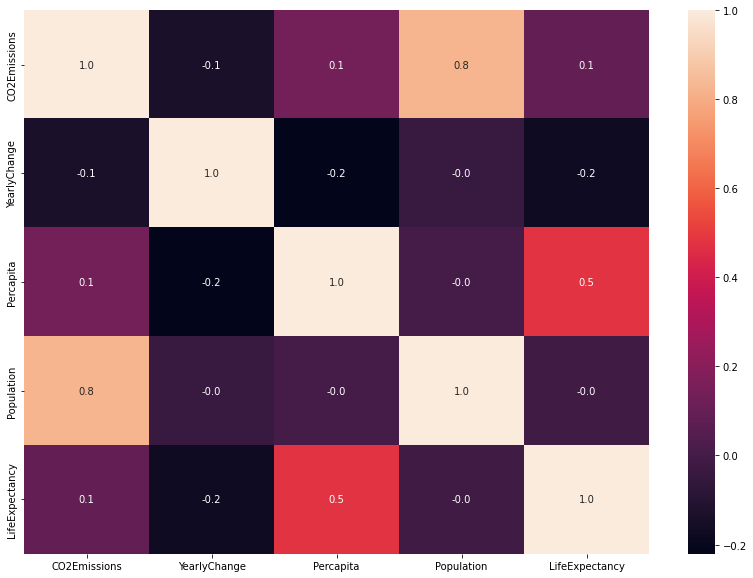

In [ ]:
df[['CO2Emissions', 'YearlyChange', 'Percapita', 'Population', 'LifeExpectancy']] = df[['CO2Emissions', 'YearlyChange', 'Percapita', 'Population', 'LifeExpectancy']].apply(pd.to_numeric)


f,ax = plt.subplots(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, fmt=".1f", ax=ax)
plt.show()


In [ ]:
px.line(x='LifeExpectancy', y='CO2Emissions', data_frame=df, title="Relation of Life Expectancy and Co2 emissions")

In [ ]:
df_life = df.groupby('Country').sum().sort_values('LifeExpectancy', ascending=False)[:20]
df_life = df_life.reset_index()
px.bar(x='Country', y ="LifeExpectancy", data_frame=df_life)

In [ ]:
df_pop = df.groupby('CO2Emissions').sum().sort_values('Population', ascending=False)
df_pop = df_pop.reset_index()
px.line(x='CO2Emissions', y ="Population", data_frame=df_pop)